In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
cid = "6540d0625e24409ea4f83ff44c9ed3b3"
secret = "81c6110978424fe3be0e23edda134f70"

#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

# playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF?si=1333723a6eff4b7f"
# playlist_link = "https://open.spotify.com/playlist/5MGi3muFW4A7exL52WaFua?si=c1f91ee9ee044266" # MY DG PLAYLIST
playlist_link = "https://open.spotify.com/playlist/1HX3Xw3Uo9P7UHtCUh27f0?si=f3ff6e8e171f4b6c" # ALL DG Songs
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [3]:
track_uris = []
track_names = []
artist_genres = []
albums = []
track_pops = []
audio_features = []
for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]
    track_uris.append(track_uri)
    
    #Track name
    track_name = track["track"]["name"]
    track_names.append(track_name)

    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)
    
    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]
    # print(artist_name)

    #Album
    album = track["track"]["album"]["name"]
    albums.append(album)
    # print(album)
    
    #Popularity of the track
    track_pop = track["track"]["popularity"]
    track_pops.append(track_pop)
    # print(track_pop)
    audio_features.append(sp.audio_features(track_uri)[0])

In [4]:
print(sp.audio_features(track_uri)[0])
print(audio_features)

danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
types = []
duration_ms = []
time_signature = []

{'danceability': 0.406, 'energy': 0.981, 'key': 11, 'loudness': -3.704, 'mode': 1, 'speechiness': 0.401, 'acousticness': 0.103, 'instrumentalness': 0, 'liveness': 0.336, 'valence': 0.637, 'tempo': 142.538, 'type': 'audio_features', 'id': '0l7aW1ZBpzpIQHdQqoBRrf', 'uri': 'spotify:track:0l7aW1ZBpzpIQHdQqoBRrf', 'track_href': 'https://api.spotify.com/v1/tracks/0l7aW1ZBpzpIQHdQqoBRrf', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0l7aW1ZBpzpIQHdQqoBRrf', 'duration_ms': 76642, 'time_signature': 4}
[{'danceability': 0.57, 'energy': 0.993, 'key': 7, 'loudness': -3.757, 'mode': 1, 'speechiness': 0.337, 'acousticness': 0.00628, 'instrumentalness': 0.00796, 'liveness': 0.0876, 'valence': 0.405, 'tempo': 87.0, 'type': 'audio_features', 'id': '781V2Y5LPtcpgONEOadadE', 'uri': 'spotify:track:781V2Y5LPtcpgONEOadadE', 'track_href': 'https://api.spotify.com/v1/tracks/781V2Y5LPtcpgONEOadadE', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/781V2Y5LPtcpgONEOadadE', 'duration_ms':

In [5]:
# {'danceability': 0.091, 'energy': 0.95, 'key': 2, 'loudness': -8.64, 'mode': 1, 'speechiness': 0.0727, 'acousticness': 0.759, 'instrumentalness': 0.778, 'liveness': 0.871, 'valence': 0.332, 'tempo': 172.317, 'type': 'audio_features', 'id': '3iCfvI6rtBhe0iWHAZs529', 'uri': 'spotify:track:3iCfvI6rtBhe0iWHAZs529', 'track_href': 'https://api.spotify.com/v1/tracks/3iCfvI6rtBhe0iWHAZs529', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3iCfvI6rtBhe0iWHAZs529', 'duration_ms': 61477, 'time_signature': 4}


for i in audio_features:
    danceability.append(i['danceability'])
    energy.append(i['energy'])
    key.append(i['key'])
    loudness.append(i['loudness'])
    mode.append(i['mode'])
    speechiness.append(i['speechiness'])
    acousticness.append(i['acousticness'])
    instrumentalness.append(i['instrumentalness'])
    liveness.append(i['liveness'])
    valence.append(i['valence'])
    tempo.append(i['tempo'])
    types.append(i['type'])
    duration_ms.append(i['duration_ms'])
    time_signature.append(i['time_signature'])


In [6]:
data = {"names": track_names, 
        "albums": albums, 
        "danceability": danceability, 
        "energy": energy, 
        "key": key,
        "loudness": loudness,
        "mode": mode,
        "speechiness": speechiness,
        "acousticness": acousticness,
        "instrumentalness": instrumentalness,
        "valence": valence,
        "tempo": tempo,
        "types": types,
        "duration_ms": duration_ms,
        "time_signature": time_signature,
        }
df = pd.DataFrame(data)

In [7]:
df.to_csv('DeathGripsDataset.csv')

<Axes: >

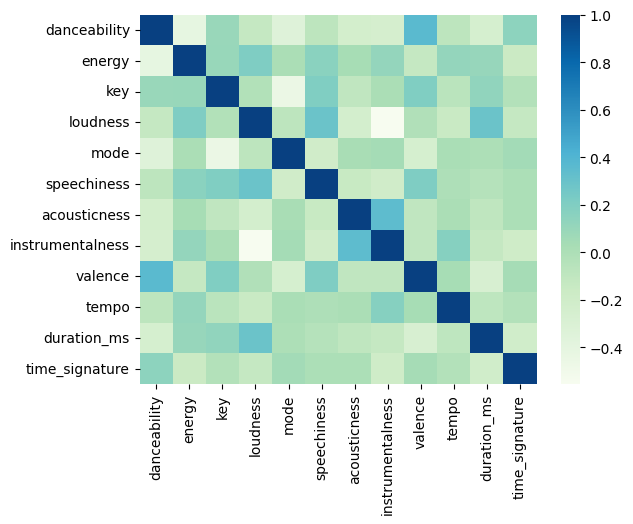

In [8]:
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu")

In [9]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   names             88 non-null     object 
 1   albums            88 non-null     object 
 2   danceability      88 non-null     float64
 3   energy            88 non-null     float64
 4   key               88 non-null     int64  
 5   loudness          88 non-null     float64
 6   mode              88 non-null     int64  
 7   speechiness       88 non-null     float64
 8   acousticness      88 non-null     float64
 9   instrumentalness  88 non-null     float64
 10  valence           88 non-null     float64
 11  tempo             88 non-null     float64
 12  types             88 non-null     object 
 13  duration_ms       88 non-null     int64  
 14  time_signature    88 non-null     int64  
dtypes: float64(8), int64(4), object(3)
memory usage: 10.4+ KB


names               0
albums              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
valence             0
tempo               0
types               0
duration_ms         0
time_signature      0
dtype: int64

In [10]:
playlist_link = "https://open.spotify.com/playlist/5MGi3muFW4A7exL52WaFua?si=fb59cfb9b000473a" # My DG playlist
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris2 = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

# track_uris2 = []
track_names2 = []
for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]
    #Track name
    track_name = track["track"]["name"]
    track_names2.append(track_name)

In [11]:
df["Labels"] = 0
print(df.loc[df['names'].isin(track_names2)].index)
for i in df.loc[df['names'].isin(track_names2)].index:
    df.at[i, "Labels"] = 1
df.to_csv("DeathGripsDataset.csv")

Int64Index([ 0,  3,  4,  5,  7, 12, 23, 24, 45, 46, 48, 50, 53, 55, 56, 57, 60,
            64, 65, 82, 83, 85],
           dtype='int64')
